In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.drop(columns=['RowNumber','Surname',"CustomerId"],inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [14]:
df = df.astype(int)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [18]:
X = df.drop(columns=['Exited'])

In [19]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [20]:
y = df['Exited']

In [21]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
X_train.shape

(8000, 11)

In [24]:
X_test.shape

(2000, 11)

In [25]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
Scaler = StandardScaler()

In [28]:
X_train_scaler = Scaler.fit_transform(X_train)

In [29]:
X_test_scaler = Scaler.fit_transform(X_test)

In [30]:
X_train_scaler

array([[ 1.27754581, -1.23264342, -0.012743  , ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       [-0.49959477,  0.28410615,  0.33282985, ...,  1.71207591,
        -0.57138416, -1.0862028 ],
       [ 0.67827747, -0.09508124, -1.39503438, ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       ...,
       [ 2.06279398, -0.28467494, -0.70388869, ..., -0.58408625,
        -0.57138416,  0.9206384 ],
       [-1.02653762,  1.42166833, -0.012743  , ...,  1.71207591,
        -0.57138416,  0.9206384 ],
       [ 0.03768029, -1.04304972,  0.67840269, ..., -0.58408625,
        -0.57138416, -1.0862028 ]])

In [31]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model=Sequential()

model.add(Dense(11,activation="sigmoid",input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
history = model.fit(X_train_scaler,y_train,batch_size=50,epochs=100,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.8819 - accuracy: 0.2775 - val_loss: 0.7103 - val_accuracy: 0.5063
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7041 - val_loss: 0.5398 - val_accuracy: 0.8119
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.7934 - val_loss: 0.4756 - val_accuracy: 0.8100
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7914 - val_loss: 0.4494 - val_accuracy: 0.8094
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7925 - val_loss: 0.4364 - val_accuracy: 0.8112
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7931 - val_loss: 0.4289 - val_accuracy: 0.8125
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.7980 - val_loss: 0.4238 - val_accuracy: 0.8175

In [36]:
y_pred = model.predict(X_test_scaler)

63/63 [==============================] - 0s 1ms/step


In [37]:
X_test_scaler

array([[ 0.83007081, -0.0583534 ,  1.76317847, ..., -0.55732934,
        -0.58350885, -1.13620013],
       [-0.06484497,  0.23487975, -1.0115688 , ...,  1.79427124,
        -0.58350885, -1.13620013],
       [-0.3458069 ,  1.7010455 ,  0.72264824, ..., -0.55732934,
        -0.58350885,  0.88012663],
       ...,
       [ 0.8716948 , -0.0583534 , -1.35841221, ..., -0.55732934,
        -0.58350885, -1.13620013],
       [ 0.38261292,  0.03939099, -1.70525562, ..., -0.55732934,
        -0.58350885, -1.13620013],
       [ 0.72601083,  0.72360167, -1.35841221, ..., -0.55732934,
        -0.58350885,  0.88012663]])

In [38]:
import numpy as np

In [39]:
y_pred_value = np.where(y_pred>0.5,1,0)

In [40]:
y_pred_value

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred_value)

0.8545

In [43]:
import matplotlib.pyplot as plt

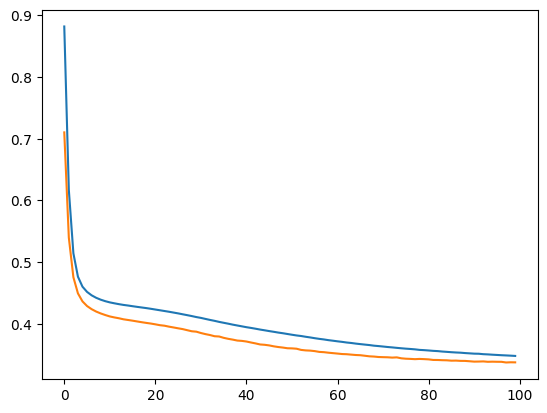

In [44]:
 plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

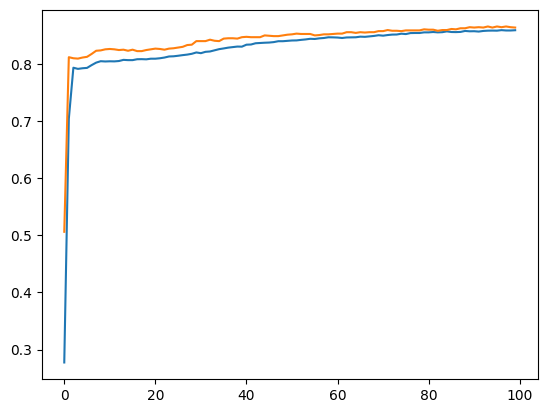

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])